# kCSD-python

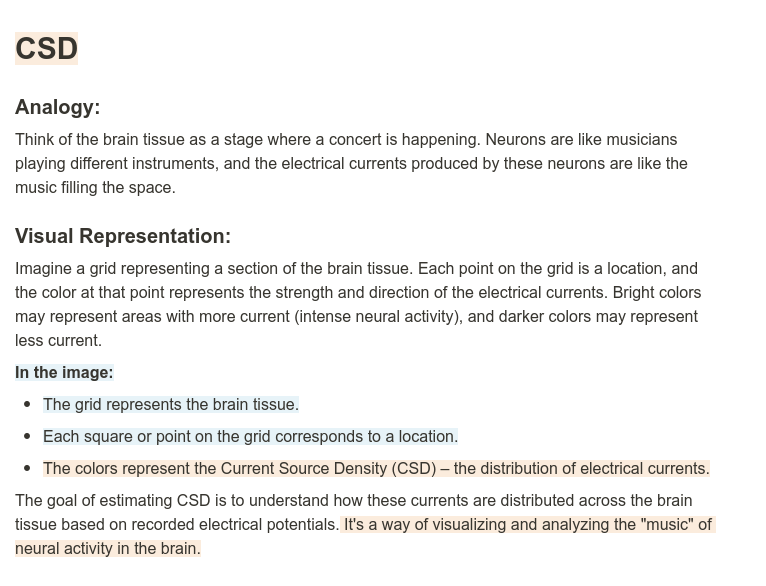

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from kcsd import KCSD2D

### Define a 2D grid (representing brain tissue)

In [3]:
grid_size = 10
brain_tissue = np.zeros((grid_size, grid_size))

### Place a current source at a specific location in the grid.

In [4]:
current_source_location = (5, 5)
brain_tissue[current_source_location] = 1

### Define electrode positions


This code is creating positions for electrodes in a 2D grid. Let me explain step by step:

1. `np.linspace(0, 9, 5)`: This creates an array of 5 equally spaced values between 0 and 9. It's essentially dividing the range [0, 9] into 5 points.
<br><br>
2. `np.meshgrid(np.linspace(0, 9, 5), np.linspace(0, 9, 5))`: This creates a 2D grid of coordinates by combining the x-coordinates and y-coordinates generated from the linspace. The resulting `ele_x` and `ele_y` are arrays representing the X and Y coordinates of the electrodes on a grid.
<br><br>
3. `ele_pos = np.vstack((ele_x.flatten(), ele_y.flatten())).T`: Here, `ele_x.flatten()` and `ele_y.flatten()` convert the 2D arrays into 1D arrays, and `np.vstack` stacks them vertically. The `.T` at the end transposes the resulting array, creating a final array where each row corresponds to the X and Y coordinates of an electrode.
<br><br>
So, in simpler terms, this code is creating positions for electrodes in a 2D grid. The `ele_pos` array will contain the X and Y coordinates of these electrodes, which are later used in the forward model to calculate potentials.

In [5]:
ele_x, ele_y = np.meshgrid(np.linspace(0, 9, 5), np.linspace(0, 9, 5))
ele_pos = np.vstack((ele_x.flatten(), ele_y.flatten())).T

### Compute potentials using forward model


The term "forward model"  refers to the mathematical representation or simulation of how electrical potentials are generated by a distribution of current sources within a given medium (such as brain tissue).

- Here, the forward model is implemented in a simplified way. It assumes that the electrical potentials at each electrode position (`pots`) are calculated based on the contributions from the underlying current sources (the locations in this brain tissue where electrical currents are generate) in the `brain_tissue`.
<br><br>
- The `np.linalg.norm(ele_pos[i] - np.array(current_source_location))` calculates the distance between the electrode position and the current source location. The term `1 / distance` represents a <b>basic influence or sensitivity factor</b>, simulating how the current at the source affects the potential at the electrode.
<br><br>
In more complex scenarios, the forward model involves solving partial differential equations that describe the electrical conductivity of the medium and the relationship between current sources and recorded potentials. The forward model essentially predicts what the recorded potentials would be given a certain distribution of current sources.


In [6]:
pots = np.zeros(ele_pos.shape[0])
for i in range(ele_pos.shape[0]):
    pots[i] = np.sum(brain_tissue * 1 / np.linalg.norm(ele_pos[i] - np.array(current_source_location)))

### Reshape potentials for kCSD input

In [7]:
pots = pots.reshape((len(ele_pos), 1))

### Use kCSD to estimate CSD

In [8]:
k = KCSD2D(ele_pos, pots)
k.cross_validate(Rs=np.linspace(0.01, 0.15, 15))
est_csd = k.values('CSD')

No lambda given, using defaults
Cross validating R (all lambda) : 0.01
Cross validating R (all lambda) : 0.019999999999999997
Cross validating R (all lambda) : 0.03
Cross validating R (all lambda) : 0.039999999999999994
Cross validating R (all lambda) : 0.049999999999999996
Cross validating R (all lambda) : 0.05999999999999999
Cross validating R (all lambda) : 0.06999999999999999
Cross validating R (all lambda) : 0.07999999999999999
Cross validating R (all lambda) : 0.08999999999999998
Cross validating R (all lambda) : 0.09999999999999998
Cross validating R (all lambda) : 0.10999999999999997
Cross validating R (all lambda) : 0.11999999999999998
Cross validating R (all lambda) : 0.12999999999999998
Cross validating R (all lambda) : 0.13999999999999999
Cross validating R (all lambda) : 0.15
R, lambda : 0.15 0.00012115276586285876


### Visualize the true CSD, electrode positions, and estimated CSD

### True CSD Visualization

<b>What it shows:</b> The actual distribution of current sources in the brain tissue.

<b>Why it's there:</b> This provides a baseline or reference showing where the sources of electrical activity are in the brain.

Text(0.5, 1.0, 'True CSD')

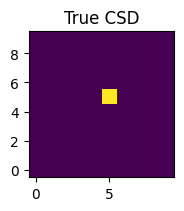

In [9]:
plt.subplot(1, 3, 1)
plt.imshow(brain_tissue, cmap='viridis', origin='lower')
plt.title('True CSD')

###  Electrode Positions Visualization

<b>What it shows:</b> The positions of electrodes on the plot, represented by red dots.

<b>Why it's there:</b> This helps visualize where the measurement points (electrodes) are located in relation to the true CSD. Electrodes are the points where electrical potentials are recorded.

Text(0.5, 1.0, 'Electrode Positions')

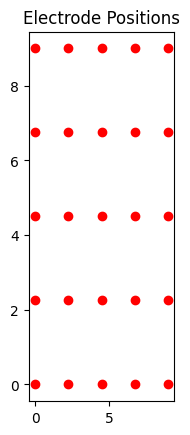

In [10]:
plt.subplot(1, 3, 2)
plt.scatter(ele_pos[:, 0], ele_pos[:, 1], c='red', marker='o')
plt.title('Electrode Positions')

###  Estimated CSD Visualization

<b>What it shows:</b> The estimated distribution of current sources in the brain tissue, obtained using the kCSD method.

<b>Why it's there:</b> This is the result of the computational method attempting to reconstruct or estimate the true CSD based on recorded potentials. It shows how well the method approximates the true distribution.

Text(0.5, 1.0, 'Estimated CSD')

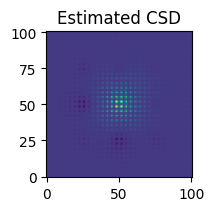

In [11]:
plt.subplot(1, 3, 3)
plt.imshow(est_csd[:, :, 0], cmap='viridis', origin='lower')
plt.title('Estimated CSD')

### In summary, the visualizations allow you to compare:

- The actual activity in the brain (True CSD),
- Where measurements are taken (Electrode Positions), and
- The method's estimate of brain activity based on those measurements (Estimated CSD).

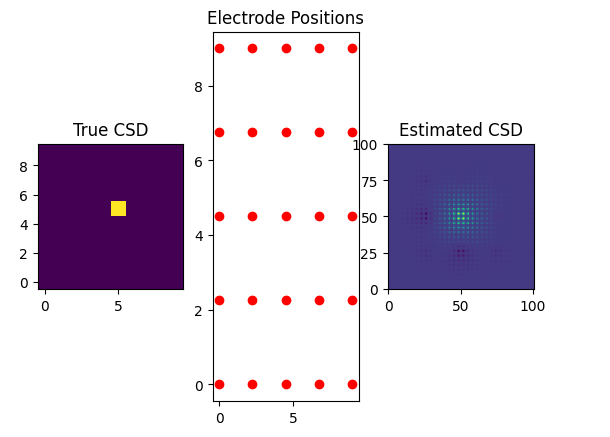